In [38]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

# Change figure aesthetics
%matplotlib inline
sns.set_context('talk', font_scale=1.2, rc={'lines.linewidth': 1.5})

In [39]:
# Load dataset
dataset_zip = np.load('dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz', allow_pickle=True, encoding='latin1')

print('Keys in the dataset:', dataset_zip.keys())
imgs = dataset_zip['imgs']
latents_values = dataset_zip['latents_values']
latents_classes = dataset_zip['latents_classes']
metadata = dataset_zip['metadata'][()]

print('Metadata: \n', metadata)

Keys in the dataset: KeysView(NpzFile 'dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz' with keys: metadata, imgs, latents_classes, latents_values)
Metadata: 
 {'date': 'April 2017', 'description': 'Disentanglement test Sprites dataset.Procedurally generated 2D shapes, from 6 disentangled latent factors.This dataset uses 6 latents, controlling the color, shape, scale, rotation and position of a sprite. All possible variations of the latents are present. Ordering along dimension 1 is fixed and can be mapped back to the exact latent values that generated that image.We made sure that the pixel outputs are different. No noise added.', 'version': 1, 'latents_names': ('color', 'shape', 'scale', 'orientation', 'posX', 'posY'), 'latents_possible_values': {'orientation': array([0.        , 0.16110732, 0.32221463, 0.48332195, 0.64442926,
       0.80553658, 0.96664389, 1.12775121, 1.28885852, 1.44996584,
       1.61107316, 1.77218047, 1.93328779, 2.0943951 , 2.25550242,
       2.41660973, 2.577717

In [40]:
# Define number of values per latents and functions to convert to indices
latents_sizes = metadata['latents_sizes']
latents_bases = np.concatenate((latents_sizes[::-1].cumprod()[::-1][1:],
                                np.array([1,])))

def latent_to_index(latents):
  return np.dot(latents, latents_bases).astype(int)


def sample_latent(size=1):
  samples = np.zeros((size, latents_sizes.size))
  for lat_i, lat_size in enumerate(latents_sizes):
    samples[:, lat_i] = np.random.randint(lat_size, size=size)

  return samples

In [41]:
# Helper function to show images
def show_images_grid(imgs_, num_images=25):
  ncols = int(np.ceil(num_images**0.5))
  nrows = int(np.ceil(num_images / ncols))
  _, axes = plt.subplots(ncols, nrows, figsize=(nrows * 3, ncols * 3))
  axes = axes.flatten()

  for ax_i, ax in enumerate(axes):
    if ax_i < num_images:
      ax.imshow(imgs_[ax_i], cmap='Greys_r',  interpolation='nearest')
      ax.set_xticks([])
      ax.set_yticks([])
    else:
      ax.axis('off')

def show_density(imgs):
  _, ax = plt.subplots()
  ax.imshow(imgs.mean(axis=0), interpolation='nearest', cmap='Greys_r')
  ax.grid('off')
  ax.set_xticks([])
  ax.set_yticks([])

Randomly sampling into the dataset

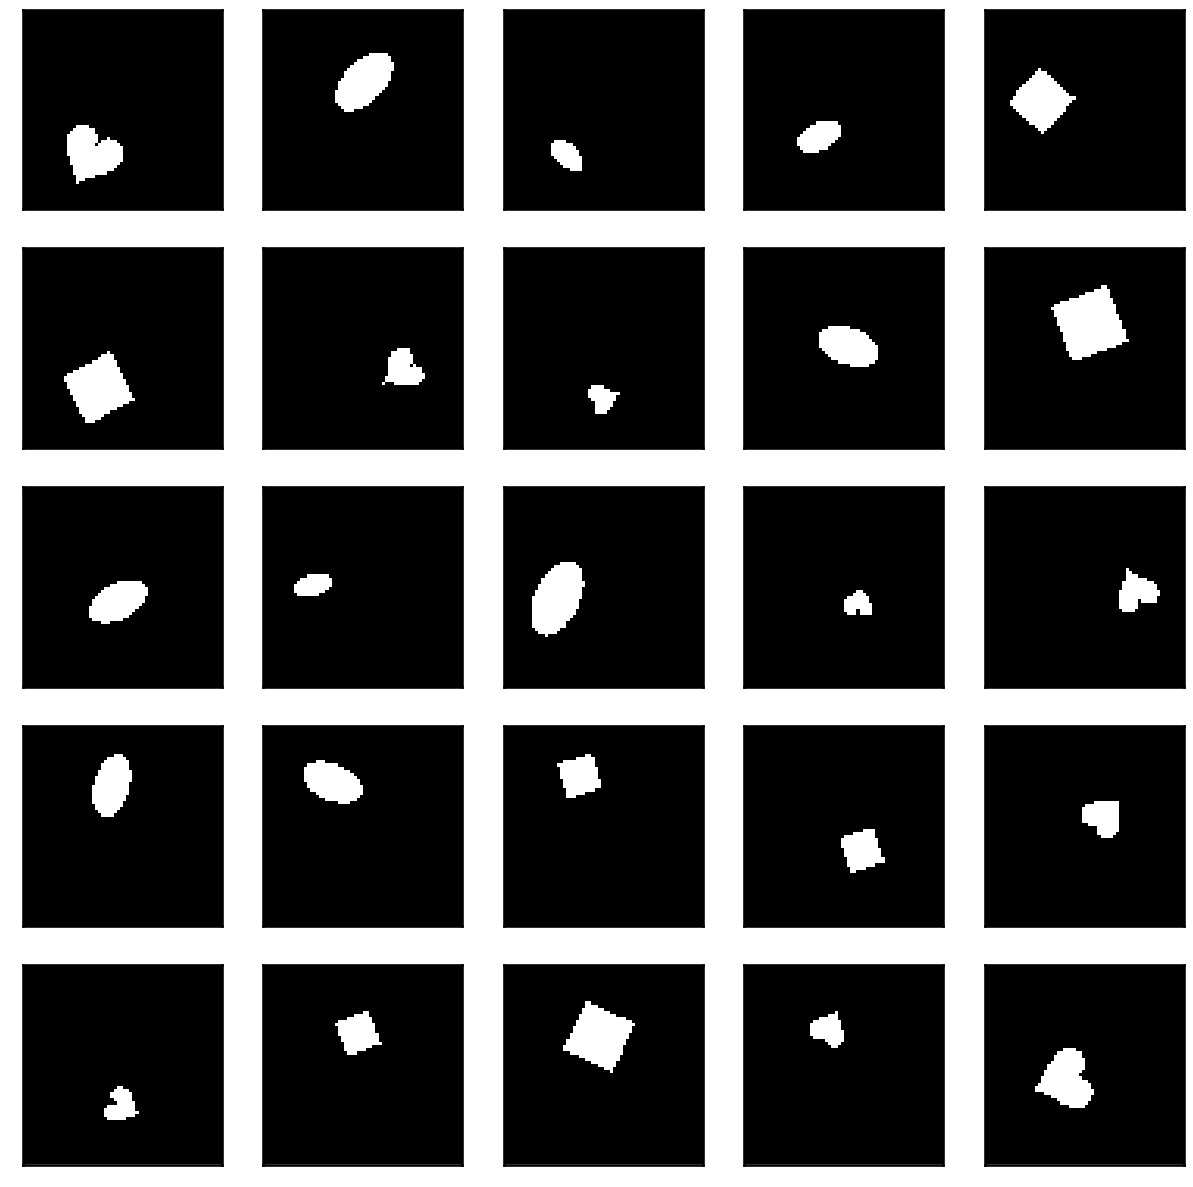

In [13]:
# Sample latents randomly
latents_sampled = sample_latent(size=5000)

# Select images
indices_sampled = latent_to_index(latents_sampled)
imgs_sampled = imgs[indices_sampled]

# Show images
show_images_grid(imgs_sampled)

Conditional sampling of dataset - fix a latent feature

(5000, 6)
(9, 64, 64)


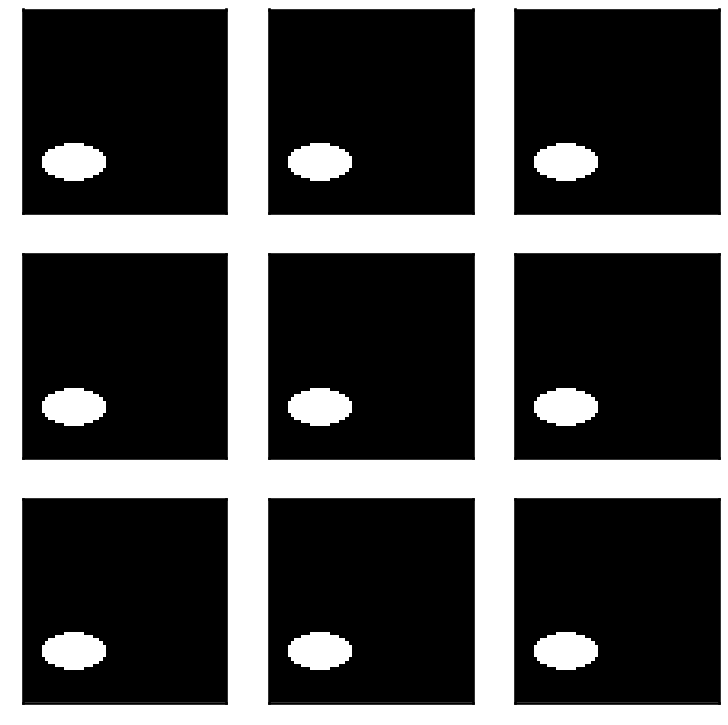

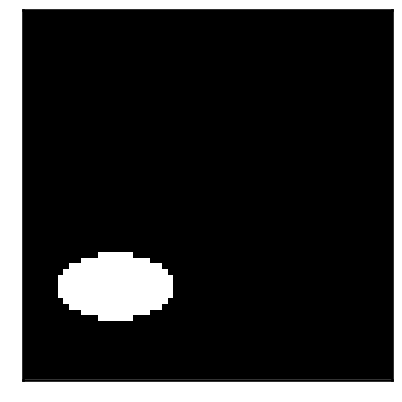

In [111]:
images_to_save = np.array([])
## Fix posX latent to left
latents_sampled = sample_latent(size=5000)
# returns sample_size, 6 latents array ('color', 'shape', 'scale', 'orientation', 'posX', 'posY')
print(latents_sampled.shape)
latents_sampled[:, 1] = 1 # fix shape to the square
latents_sampled[:, 2] = 3 # fix scale to the middle size
latents_sampled[:, 3] = 0 # fix orientation to horizontal 
latents_sampled[:, 5] = 31 # fix posY to the top
latents_sampled[:, 4] = 0

indices_sampled = latent_to_index(latents_sampled)
imgs_sampled = imgs[indices_sampled]
print(imgs_sampled[:9, :, :].reshape(9, 64, 64).shape)
# Samples
show_images_grid(imgs_sampled[:9, :, :].reshape(9, 64, 64), 9)
imgs_sampled_1 = imgs_sampled[0, :, :].reshape(1, 64, 64)
# # Show the density too to check
show_density(imgs_sampled)

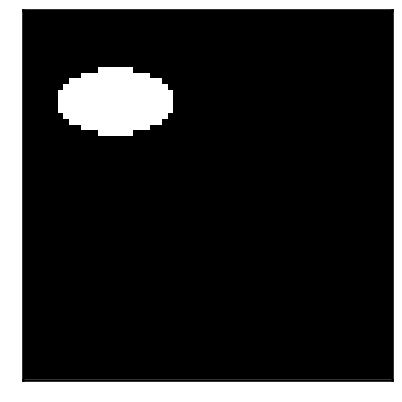

In [56]:
## Fix posX latent to left
latents_sampled_2 = sample_latent(size=5000)
# returns sample_size, 6 latents array ('color', 'shape', 'scale', 'orientation', 'posX', 'posY')
latents_sampled_2[:, 1] = 1 # fix shape to the square
latents_sampled_2[:, 2] = 3 # fix scale to the middle size
latents_sampled_2[:, 3] = 0 # fix orientation to horizontal 
latents_sampled_2[:, 5] = 0 # fix posY to the top
latents_sampled_2[:, 4] = 0

indices_sampled_2 = latent_to_index(latents_sampled_2)
imgs_sampled_2 = imgs[indices_sampled_2][0, :, :].reshape(1, 64, 64)

show_density(imgs_sampled_2)

In [57]:
np.savez('posx_0.npz', imgs=np.concatenate((imgs_sampled_1, imgs_sampled_2), axis=0))

In [62]:
dataset_zip = np.load('posx_0.npz', allow_pickle=True, encoding='latin1')
dataset_zip['imgs'].shape

(2, 64, 64)

In [ ]:
lat_names = ('shape', 'scale', 'orientation', 'posX', 'posY')
lat_sizes = np.array([3, 6, 40, 32, 32])
img_size = (1, 64, 64)
lat = 'posX'
for i in range(lat_sizes[lat_names.index(lat)]):
    latents_sampled = sample_latent(size=5000)
    latents_sampled[:, -2] = 0 # fix posX to left

    latents_sampled[:, lat_names.index(lat)] = i
    indices_sampled = latent_to_index(latents_sampled)
    imgs_sampled = imgs[indices_sampled]
    np.savez('dsprites_disentangled/' + lat + '_' + str(i) + '.npz', imgs_sampled)

In [9]:
## Fix shape latent to be square
latents_sampled = sample_latent(size=5000)
# returns sample_size, 6 latents array ('color', 'shape', 'scale', 'orientation', 'posX', 'posY')
print(latents_sampled.shape)
# latents_sampled[:, 1] = 0 # this is SHAPE = square
# latents_sampled[:, 1] = 1 # this is SHAPE = eclipse
# latents_sampled[:, 1] = 2 # this is SHAPE = heart


indices_sampled = latent_to_index(latents_sampled)
imgs_sampled = imgs[indices_sampled]

# Samples
show_images_grid(imgs_sampled, 9)

# Show the density too to check
show_density(imgs_sampled)

(5000, 6)


IndexError: index 972983 is out of bounds for axis 0 with size 737280

In [96]:
def kl_divergence(mu_p, sigma_p, mu_q, sigma_q):
    # Ensure that the standard deviations are not too small
    sigma_p = max(sigma_p, 1e-10)
    sigma_q = max(sigma_q, 1e-10)

    # Calculate the KL divergence
    kl_div = np.log(sigma_q / sigma_p) + (sigma_p**2 + (mu_p - mu_q)**2) / (2 * sigma_q**2) - 0.5

    return kl_div

KL divergence for latent variable 1: 94.91
KL divergence for latent variable 2: 1681.63
KL divergence for latent variable 3: 9.96
KL divergence for latent variable 4: 665.59
KL divergence for latent variable 5: 389.78
KL divergence for latent variable 6: 14.27
KL divergence for latent variable 7: 2.71
KL divergence for latent variable 8: 1.51
KL divergence for latent variable 9: 8.07
KL divergence for latent variable 10: 1.50


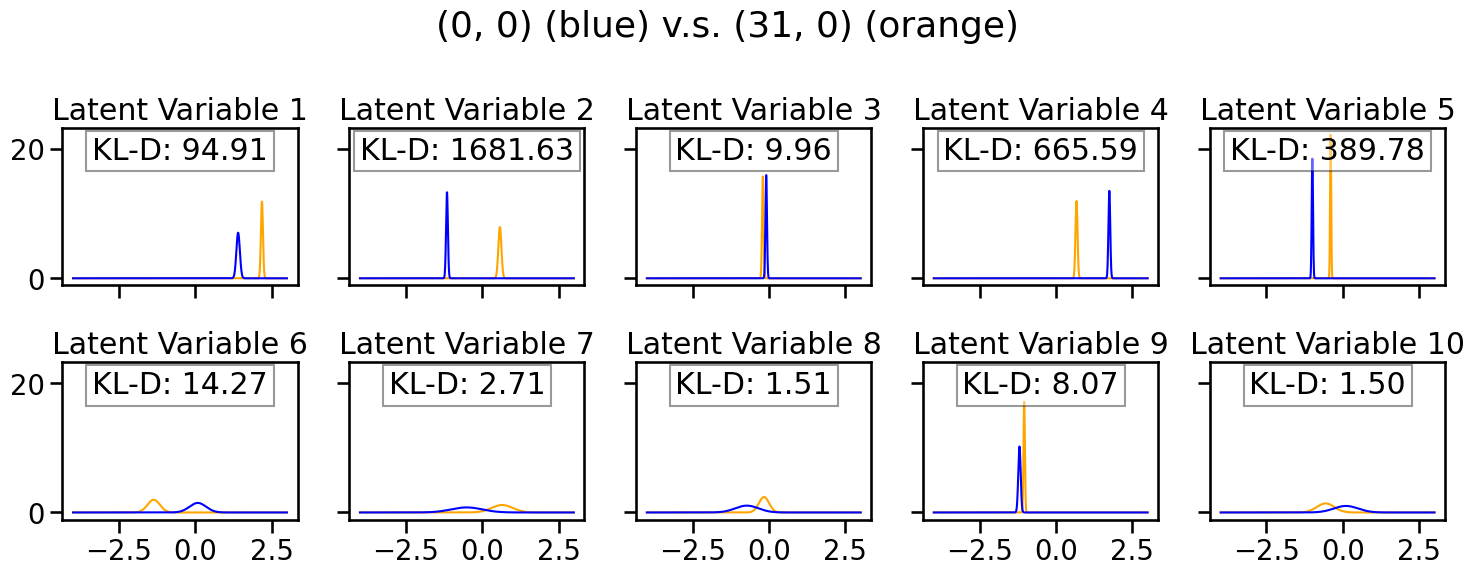

In [103]:
from scipy.stats import norm

# visualize gaussian variables
mu_r = np.array([ 2.1831,  0.5798, -0.2040,  0.6722, -0.4008, -1.3614,  0.6552, -0.1663,
         -1.0398, -0.5650])
std_r = np.sqrt(np.exp(np.array([-6.7911, -5.9796, -7.3565, -6.7996, -8.0549, -3.1892, -2.1220, -3.5778,
         -7.5354, -2.5093])))

mu_l = np.array([ 1.4037, -1.1514, -0.0932,  1.7475, -0.9982,  0.0820, -0.5081, -0.7269,
         -1.1947,  0.1007])
std_l = np.sqrt(np.exp(np.array([-5.7424, -7.0228, -7.3919, -7.0486, -7.6890, -2.6123, -1.3411, -1.9470,
         -6.4867, -1.8525])))

latent_variables = np.arange(1, 11)

x_values = np.linspace(-4, 3, 1000)  # Adjust the range based on your data

# calculate KL divergence
kl_ds = []
for i in range(len(mu_r)):
    kl_d = kl_divergence(mu_r[i], std_r[i], mu_l[i], std_l[i])
    kl_ds.append(kl_d)
    print(f'KL divergence for latent variable {i+1}: {kl_d:.2f}')

# a plot for each variable
fig, axs = plt.subplots(2, 5, figsize=(15, 6), sharex=True, sharey=True)

for i in range(2):
    for j in range(5):
        idx = i * 5 + j
        ax = axs[i, j]

        # Plot the Gaussian curves
        ax.plot(x_values, norm.pdf(x_values, mu_r[idx], std_r[idx]), label='Distribution 1', color='orange')
        ax.plot(x_values, norm.pdf(x_values, mu_l[idx], std_l[idx]), label='Distribution 2', color='blue')

        # Add labels and title
        ax.set_title(f'Latent Variable {idx+1}')

        # Add KL divergence value as text annotation
        ax.text(0.5, 0.85, f'KL-D: {kl_ds[idx]:.2f}', transform=ax.transAxes,
                bbox=dict(facecolor='white', alpha=0.4), ha='center', va='center')

# Adjust layout
fig.suptitle('(0, 0) (blue) v.s. (31, 0) (orange)')

plt.tight_layout()
plt.show()

# latents_sampled_2[:, 1] = 1 # fix shape to the square
# latents_sampled_2[:, 2] = 3 # fix scale to the middle size
# latents_sampled_2[:, 3] = 0 # fix orientation to horizontal 
# latents_sampled_2[:, 5] = 0 # fix posY to the top

KL divergence for latent variable 1: 17.65
KL divergence for latent variable 2: 2409.05
KL divergence for latent variable 3: 163.66
KL divergence for latent variable 4: 492.26
KL divergence for latent variable 5: 18.42
KL divergence for latent variable 6: 1.30
KL divergence for latent variable 7: 3.66
KL divergence for latent variable 8: 3.56
KL divergence for latent variable 9: 392.87
KL divergence for latent variable 10: 0.57


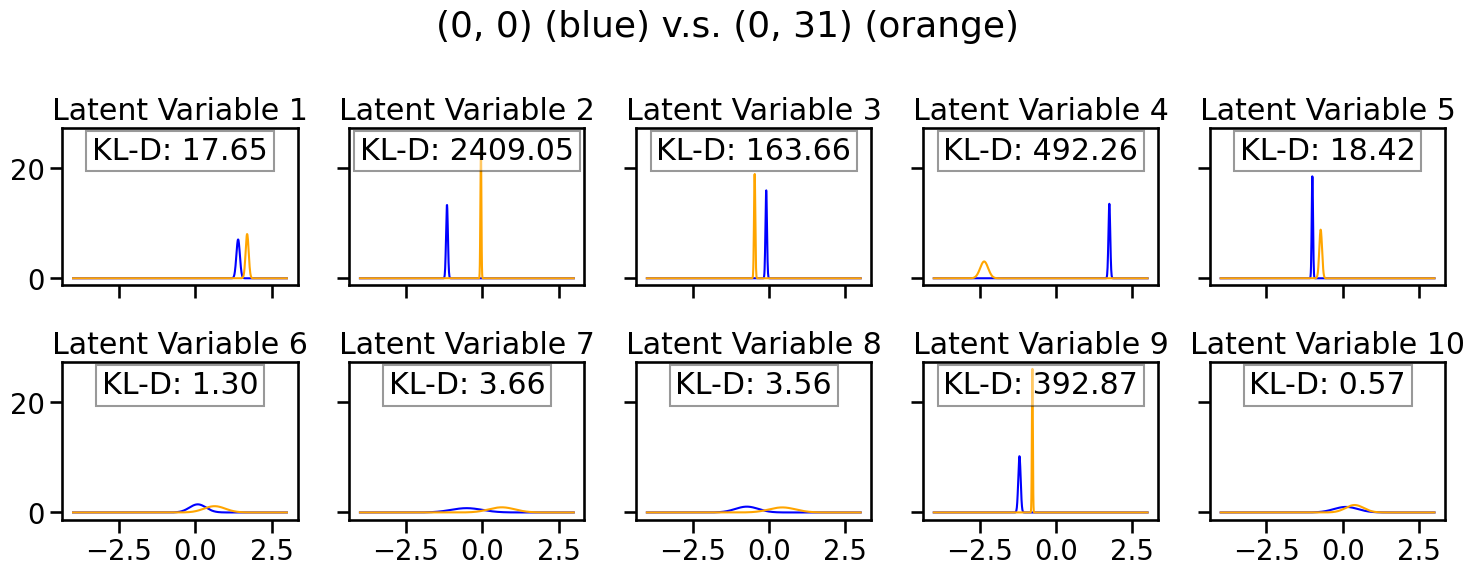

In [106]:
from scipy.stats import norm

# visualize gaussian variables
mu_t = np.array([ 1.4037, -1.1514, -0.0932,  1.7475, -0.9982,  0.0820, -0.5081, -0.7269,
         -1.1947,  0.1007])
std_t = np.sqrt(np.exp(np.array([-5.7424, -7.0228, -7.3919, -7.0486, -7.6890, -2.6123, -1.3411, -1.9470,
         -6.4867, -1.8525])))

mu_b = np.array([ 1.6989, -0.0417, -0.4713, -2.3507, -0.7265,  0.6333,  0.6427,  0.4338,
         -0.7723,  0.3846])
std_b = np.sqrt(np.exp(np.array([-6.0031, -8.2717, -7.7359, -4.0690, -6.1929, -2.1006, -1.7007, -1.6597,
         -8.3854, -2.4401])))

latent_variables = np.arange(1, 11)

x_values = np.linspace(-4, 3, 1000)  # Adjust the range based on your data


# calculate KL divergence
kl_ds = []
for i in range(len(mu_t)):
    kl_d = kl_divergence(mu_t[i], std_t[i], mu_b[i], std_b[i])
    kl_ds.append(kl_d)
    print(f'KL divergence for latent variable {i+1}: {kl_d:.2f}')

# a plot for each variable
fig, axs = plt.subplots(2, 5, figsize=(15, 6), sharex=True, sharey=True)

for i in range(2):
    for j in range(5):
        idx = i * 5 + j
        ax = axs[i, j]

        # Plot the Gaussian curves
        ax.plot(x_values, norm.pdf(x_values, mu_t[idx], std_t[idx]), label='Distribution 1', color='blue')
        ax.plot(x_values, norm.pdf(x_values, mu_b[idx], std_b[idx]), label='Distribution 2', color='orange')

        # Add labels and title
        ax.set_title(f'Latent Variable {idx+1}')

        # Add KL divergence value as text annotation
        ax.text(0.5, 0.85, f'KL-D: {kl_ds[idx]:.2f}', transform=ax.transAxes,
                bbox=dict(facecolor='white', alpha=0.4), ha='center', va='center')
        
# Adjust layout
fig.suptitle('(0, 0) (blue) v.s. (0, 31) (orange)')

plt.tight_layout()
plt.show()

KL divergence for latent variable 1: 362.43
KL divergence for latent variable 2: 650.19
KL divergence for latent variable 3: 23.86
KL divergence for latent variable 4: 528.38
KL divergence for latent variable 5: 57.36
KL divergence for latent variable 6: 6.99
KL divergence for latent variable 7: 9.91
KL divergence for latent variable 8: 0.54
KL divergence for latent variable 9: 2041.73
KL divergence for latent variable 10: 0.11


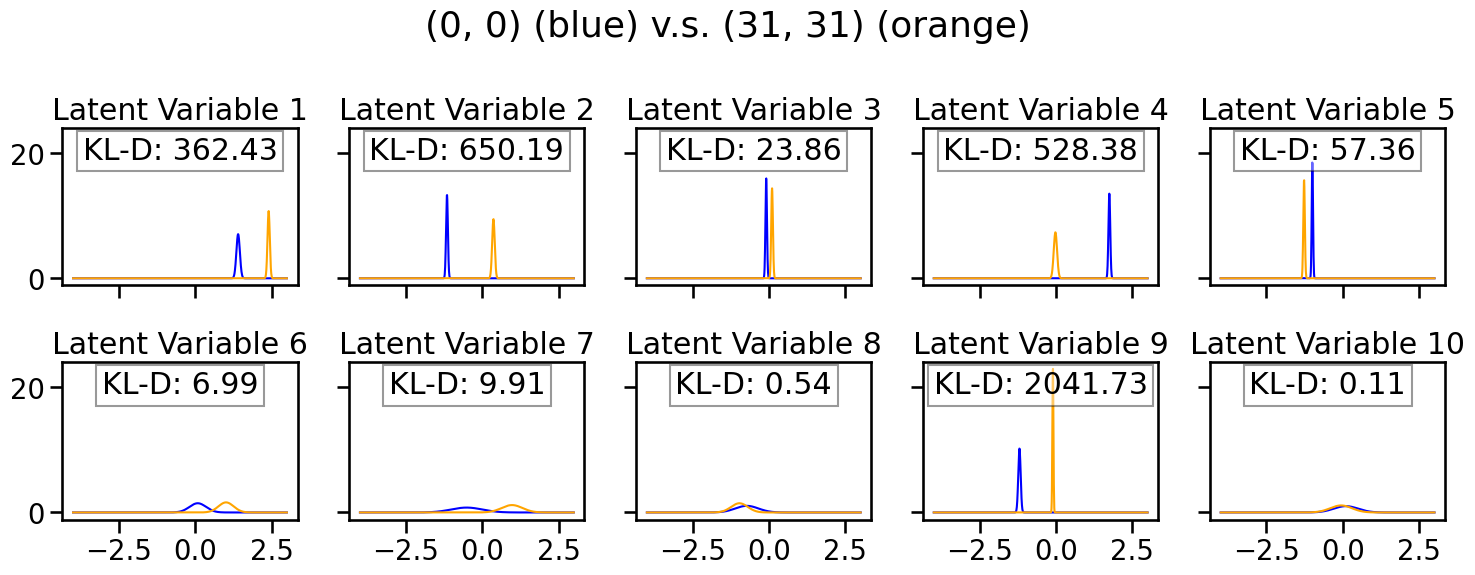

In [107]:
mu_0_0 = np.array([ 1.4037, -1.1514, -0.0932,  1.7475, -0.9982,  0.0820, -0.5081, -0.7269,
         -1.1947,  0.1007])
std_0_0 = np.sqrt(np.exp(np.array([-5.7424, -7.0228, -7.3919, -7.0486, -7.6890, -2.6123, -1.3411, -1.9470,
         -6.4867, -1.8525])))

mu_31_31 = np.array([ 2.4028,  0.3697,  0.0986, -0.0180, -1.2698,  1.0079,  0.9785, -0.9688,
         -0.1001, -0.0573])
std_31_31 = np.sqrt(np.exp(np.array([-6.5871, -6.3314, -7.1674, -5.8256, -7.3489, -2.7904, -2.1705, -2.6086,
         -8.1333, -2.0670])))

latent_variables = np.arange(1, 11)

x_values = np.linspace(-4, 3, 1000)  # Adjust the range based on your data

# calculate KL divergence
kl_ds = []
for i in range(len(mu_0_0)):
    kl_d = kl_divergence(mu_0_0[i], std_0_0[i], mu_31_31[i], std_31_31[i])
    kl_ds.append(kl_d)
    print(f'KL divergence for latent variable {i+1}: {kl_d:.2f}')

# a plot for each variable
fig, axs = plt.subplots(2, 5, figsize=(15, 6), sharex=True, sharey=True)

for i in range(2):
    for j in range(5):
        idx = i * 5 + j
        ax = axs[i, j]

        # Plot the Gaussian curves
        ax.plot(x_values, norm.pdf(x_values, mu_0_0[idx], std_0_0[idx]), label='Distribution 1', color='blue')
        ax.plot(x_values, norm.pdf(x_values, mu_31_31[idx], std_31_31[idx]), label='Distribution 2', color='orange')

        # Add labels and title
        ax.set_title(f'Latent Variable {idx+1}')

        # Add KL divergence value as text annotation
        ax.text(0.5, 0.85, f'KL-D: {kl_ds[idx]:.2f}', transform=ax.transAxes,
                bbox=dict(facecolor='white', alpha=0.4), ha='center', va='center')

# Adjust layout
fig.suptitle('(0, 0) (blue) v.s. (31, 31) (orange)')

plt.tight_layout()
plt.show()

KL divergence for latent variable 1: 1856.23
KL divergence for latent variable 2: 3121.79
KL divergence for latent variable 3: 444.25
KL divergence for latent variable 4: 1762.26
KL divergence for latent variable 5: 30.44
KL divergence for latent variable 6: 0.68
KL divergence for latent variable 7: 0.40
KL divergence for latent variable 8: 0.69
KL divergence for latent variable 9: 21.03
KL divergence for latent variable 10: 0.26


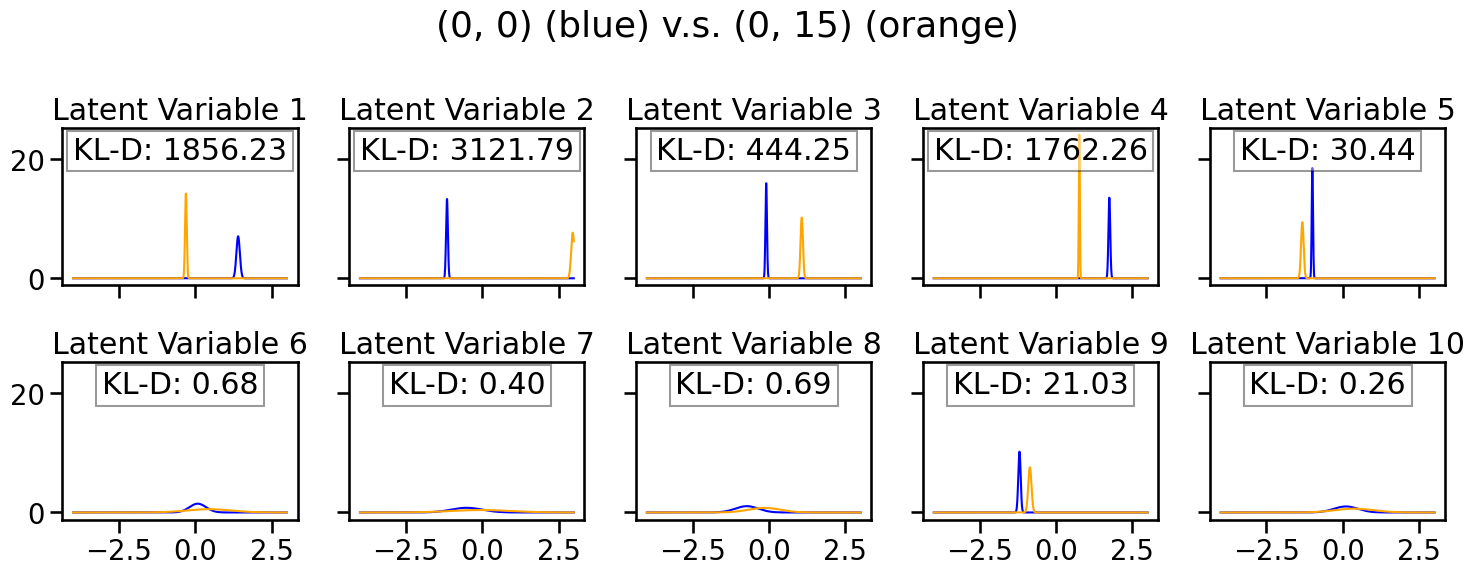

In [108]:
mu_0_0 = np.array([ 1.4037, -1.1514, -0.0932,  1.7475, -0.9982,  0.0820, -0.5081, -0.7269,
         -1.1947,  0.1007])
std_0_0 = np.sqrt(np.exp(np.array([-5.7424, -7.0228, -7.3919, -7.0486, -7.6890, -2.6123, -1.3411, -1.9470,
         -6.4867, -1.8525])))
mu_0_15 = np.array([-0.3064,  2.9664,  1.0699,  0.7643, -1.3266,  0.4414, -0.0425, -0.1523,
         -0.8536,  0.3796])
std_0_15 = np.sqrt(np.exp(np.array([-7.1459, -5.9086, -6.4870, -8.2011, -6.3256, -0.6438, -0.0541, -1.3025,
         -5.8865, -0.9200])))

latent_variables = np.arange(1, 11)

x_values = np.linspace(-4, 3, 1000)  # Adjust the range based on your data

# calculate KL divergence
kl_ds = []
for i in range(len(mu_0_0)):
    kl_d = kl_divergence(mu_0_0[i], std_0_0[i], mu_0_15[i], std_0_15[i])
    kl_ds.append(kl_d)
    print(f'KL divergence for latent variable {i+1}: {kl_d:.2f}')

# a plot for each variable
fig, axs = plt.subplots(2, 5, figsize=(15, 6), sharex=True, sharey=True)

for i in range(2):
    for j in range(5):
        idx = i * 5 + j
        ax = axs[i, j]

        # Plot the Gaussian curves
        ax.plot(x_values, norm.pdf(x_values, mu_0_0[idx], std_0_0[idx]), label='Distribution 1', color='blue')
        ax.plot(x_values, norm.pdf(x_values, mu_0_15[idx], std_0_15[idx]), label='Distribution 2', color='orange')

        # Add labels and title
        ax.set_title(f'Latent Variable {idx+1}')

        # Add KL divergence value as text annotation
        ax.text(0.5, 0.85, f'KL-D: {kl_ds[idx]:.2f}', transform=ax.transAxes,
                bbox=dict(facecolor='white', alpha=0.4), ha='center', va='center')

# Adjust layout
fig.suptitle('(0, 0) (blue) v.s. (0, 15) (orange)')

plt.tight_layout()
plt.show()